# 1. Introduction

In this Project, I will complete a machine learning workflow using classification solutions, including data preparation, modeling (including hyperparameter tuning), and final model evaluation.

## 1.1. Business Understanding

Your goal is to predict the operating condition of a waterpoint for each record in the dataset.

Using data from Taarifa and the Tanzanian Ministry of Water, can you predict which pumps are functional, which need some repairs, and which don't work at all? Predict one of these three classes based on a number of variables about what kind of pump is operating, when it was installed, and how it is managed. A smart understanding of which waterpoints will fail can improve maintenance operations and ensure that clean, potable water is available to communities across Tanzania.

## 2.2. Objectives

- jdnlknlknblkn
- nnlrnknklnknm
- jnnklnk;m;lm;lm;lm
- njbnjnknkmnkm;lm

# 2. Requirements

- Loading Notebook Libraries
- Loading Dataset
- Explore Dataset
- Data Cleaning
- Analysing Preprocessing

# 3. Data Understanding

The data for this project comes from the Taarifa waterpoints dashboard, which aggregates data from the Tanzania Ministry of Water.

Taarifa is an open source platform for the crowd sourced reporting and triaging of infrastructure related issues.

There are three datasets for this project:
- Test set values (14850 rows × 40 columns)
- Training set labels (59400 rows × 40 columns)
- Training set values (59400 rows × 40 columns)


## 2.1 Loading Libraries

In [1]:
#load relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

## 2.2 Loading Datasets

In [2]:
# Loading datasets
train_values = pd.read_csv('training set.csv')
train_labels = pd.read_csv('training set.csv')
test_values = pd.read_csv('test set.csv')

## 2.3 Explore dataframes

In [3]:
train_values.head(3)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe


In [4]:
train_labels.head(3)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe


In [5]:
test_values.head(3)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other


#### Observation

- I will need to merge train values and train labels.

- The id column seems to be a unique identifier so I will make it and index column for both train and test dataframe

In [6]:
# Set id column as index column
test = test_values
test.set_index('id', inplace = True)
test.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [7]:
# Merge train values and train labels dataframes
train = train_values.merge(train_labels, how='inner')
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [8]:
# expanding the number of visible columns

pd.set_option('display.max_columns', 30)

In [9]:
#  Set id as index column
train.set_index('id', inplace = True)
train.head(10)

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,...,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,...,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,...,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,...,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,...,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,...,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,...,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe
19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,Internal,Ishinabulandi,Shinyanga,17,3,Shinyanga Rural,...,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,Lake Tanganyika,Nyawishi Center,Shinyanga,17,3,Kahama,...,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,Lake Tanganyika,Imalauduki,Tabora,14,6,Tabora Urban,...,india mark ii,handpump,vwc,user-group,never pay,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump


### Columns in the dataset

- amount_tsh      - Total static head (amount water available to waterpoint)
- date_recorded   - The date the row was entered
- funder          - Who funded the well
- gps_height      - Altitude of the well
- installer       - Organization that installed the well
- longitude       - GPS coordinate
- latitude        - GPS coordinate
- wpt_name        - Name of the waterpoint if there is one
- num_private     -
- basin           - Geographic water basin
- subvillage      - Geographic location
- region          - Geographic location
- region_code     - Geographic location (coded)
- district_code   - Geographic location (coded)
- lga             - Geographic location
- ward            - Geographic location
- population      - Population around the well
- public_meeting  - True/False
- recorded_by     - Group entering this row of data
- scheme_management     - Who operates the waterpoint
- scheme_name           - Who operates the waterpoint
- permit                - If the waterpoint is permitted
- construction_year     - Year the waterpoint was constructed
- extraction_type       - The kind of extraction the waterpoint uses
- extraction_type_group - The kind of extraction the waterpoint uses
- extraction_type_class - The kind of extraction the waterpoint uses
- management            - How the waterpoint is managed
- management_group      - How the waterpoint is managed
- payment               - What the water costs
- payment_type          - What the water costs
- water_quality         - The quality of the water
- quality_group         - The quality of the water
- quantity              - The quantity of water
- quantity_group        - The quantity of water
- source                - The source of the water
- source_type           - The source of the water
- source_class          - The source of the water
- waterpoint_type       - The kind of waterpoint
- waterpoint_type_group - The kind of waterpoint

#### Observation
- There seems to be duplicated columns in the dataframe.

- They have same infomation.

- I will expore that further later

#### status_group column

There is need for an additional column that rates the condition of the waterpoints as:

- functional - the waterpoint is operational and there are no repairs needed
- functional needs repair - the waterpoint is operational, but needs repairs
- non functional - the waterpoint is not operational

In [10]:
#Check dataframe shapes
print('Train:', train.shape)
print()
print('Test:', test.shape)

Train: (59400, 39)

Test: (14850, 39)


In [11]:
# Chech train dataframe information
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15

In [12]:
# Check train dataframe description
train.describe().T

,count,mean,std,min,25%,50%,75%,max
amount_tsh,59400.0,317.650385,2997.574558,0.00000,0.000000,0.000000,20.000000,3.500000e+05
gps_height,59400.0,668.297239,693.116350,-90.00000,0.000000,369.000000,1319.250000,2.770000e+03
longitude,59400.0,34.077427,6.567432,0.00000,33.090347,34.908743,37.178387,4.034519e+01
latitude,59400.0,-5.706033,2.946019,-11.64944,-8.540621,-5.021597,-3.326156,-2.000000e-08
num_private,59400.0,0.474141,12.236230,0.00000,0.000000,0.000000,0.000000,1.776000e+03
region_code,59400.0,15.297003,17.587406,1.00000,5.000000,12.000000,17.000000,9.900000e+01
district_code,59400.0,5.629747,9.633649,0.00000,2.000000,3.000000,5.000000,8.000000e+01
population,59400.0,179.909983,471.482176,0.00000,0.000000,25.000000,215.000000,3.050000e+04
construction_year,59400.0,1300.652475,951.620547,0.00000,0.000000,1986.000000,2004.000000,2.013000e+03


# 2. Data Cleaning

The data cleaning methods to be employed are :

- Duplicates
- Validity
- Completeness


## 2.1. Duplicates
- Checking for duplicates in the rows

In [13]:
train.duplicated().sum()

37

In [14]:
#get an overview of the duplicates
train[train.duplicated(keep = False)].head(6)

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,...,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
72678,0.0,2013-01-30,Wvt,0,WVT,0.0,-2.000000e-08,Wvt Tanzania,0,Lake Victoria,Ilula,Shinyanga,17,1,Bariadi,...,gravity,gravity,parastatal,parastatal,other,other,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
70379,0.0,2011-07-18,Government Of Tanzania,0,Government,0.0,-2.000000e-08,Nersing College,0,Lake Victoria,Nyanza,Mwanza,19,6,Geita,...,afridev,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,hand pump,hand pump
51403,0.0,2013-02-16,Dwsp,0,DWE,0.0,-2.000000e-08,Serengeti,0,Lake Victoria,Madukani,Mwanza,17,1,Magu,...,other,other,wug,user-group,unknown,unknown,soft,good,enough,enough,other,other,unknown,other,other
7900,0.0,2011-07-18,Government Of Tanzania,0,Government,0.0,-2.000000e-08,Hospital,0,Lake Victoria,Nyanza,Mwanza,19,6,Geita,...,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
58343,0.0,2013-01-18,Wvt,0,WVT,0.0,-2.000000e-08,Shule Ya Msingi Mwamigagani,0,Lake Victoria,Mwalushu B,Shinyanga,17,1,Bariadi,...,gravity,gravity,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
3376,0.0,2012-10-25,Dwsp,0,DWE,0.0,-2.000000e-08,Wazazi,0,Lake Victoria,Madukani,Mwanza,17,1,Magu,...,swn 80,handpump,wug,user-group,unknown,unknown,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [15]:
#drop all duplicates
train.drop_duplicates(inplace=True)

In [16]:
# Confirming all duplicates are dropped
train.duplicated().any()

False

As mentioned earlier there are columns that seem to have repeated information.
I will explore these columns to assertain if they are indeed duplicated then drop some of them.

In [17]:
train.apply(lambda x: len(x.unique()))

amount_tsh                  98
date_recorded              356
funder                    1898
gps_height                2428
installer                 2146
longitude                57516
latitude                 57517
wpt_name                 37400
num_private                 65
basin                        9
subvillage               19288
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2092
population                1049
public_meeting               3
recorded_by                  1
scheme_management           13
scheme_name               2697
permit                       3
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity

#### Waterpoint

In [18]:
train['waterpoint_type'].value_counts()

communal standpipe             28515
hand pump                      17466
other                           6377
communal standpipe multiple     6099
improved spring                  783
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [19]:
train['waterpoint_type_group'].value_counts()

communal standpipe    34614
hand pump             17466
other                  6377
improved spring         783
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [20]:
# Both columns have the same data
# Communal standpipe and standpipe multiple are merged in waterpoint type group
# I will drop one of the columns. 
train = train.drop(['waterpoint_type'],axis=1)
test = test.drop(['waterpoint_type'],axis=1)

#### Source

In [21]:
train['source'].value_counts()

spring                  17020
shallow well            16801
machine dbh             11069
river                    9612
rainwater harvesting     2292
hand dtw                  874
lake                      763
dam                       655
other                     211
unknown                    66
Name: source, dtype: int64

In [22]:
train['source_type'].value_counts()

spring                  17020
shallow well            16801
borehole                11943
river/lake              10375
rainwater harvesting     2292
dam                       655
other                     277
Name: source_type, dtype: int64

In [23]:
train['source_class'].value_counts()

groundwater    45764
surface        13322
unknown          277
Name: source_class, dtype: int64

In [24]:
# Source and source type have similar data 
# Some values are merged in the source type column
# I will drop one of the columns
train = train.drop(['source'],axis=1)
test = test.drop(['source'],axis=1)

#### Quantity

In [25]:
train['quantity'].value_counts()

enough          33165
insufficient    15119
dry              6243
seasonal         4047
unknown           789
Name: quantity, dtype: int64

In [26]:
train['quantity_group'].value_counts()

enough          33165
insufficient    15119
dry              6243
seasonal         4047
unknown           789
Name: quantity_group, dtype: int64

In [27]:
# Both columns have the same data
# I will drop one of the columns. 
train = train.drop(['quantity_group'],axis=1)
test = test.drop(['quantity_group'],axis=1)

#### Quality

In [28]:
train['water_quality'].value_counts()

soft                  50784
salty                  4856
unknown                1873
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [29]:
train['quality_group'].value_counts()

good        50784
salty        5195
unknown      1873
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [30]:
# Source and source type have similar data 
# Some values are merged in the quality group column
# I will drop one of the columns
train = train.drop(['quality_group'],axis=1)
test = test.drop(['quality_group'],axis=1)

#### Payment

In [31]:
train['payment'].value_counts()

never pay                25336
pay per bucket            8984
pay monthly               8300
unknown                   8134
pay when scheme fails     3914
pay annually              3642
other                     1053
Name: payment, dtype: int64

In [32]:
train['payment_type'].value_counts()

never pay     25336
per bucket     8984
monthly        8300
unknown        8134
on failure     3914
annually       3642
other          1053
Name: payment_type, dtype: int64

In [33]:
# Both columns have the same data
# I will drop one of the columns. 
train = train.drop(['payment'],axis=1)
test = test.drop(['payment'],axis=1)

#### Management

In [34]:
train['management'].value_counts()

vwc                 40493
wug                  6495
water board          2933
wua                  2535
private operator     1971
parastatal           1765
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [35]:
train['management_group'].value_counts()

user-group    52456
commercial     3638
parastatal     1765
other           943
unknown         561
Name: management_group, dtype: int64

In [36]:
# Source and source type have similar data 
# Some values are merged in the management group column
# I will drop one of the columns
train = train.drop(['management'],axis=1)
test = test.drop(['management'],axis=1)

#### Extraction

In [37]:
train['extraction_type'].value_counts()

gravity                      26775
nira/tanira                   8143
other                         6427
submersible                   4759
swn 80                        3663
mono                          2865
india mark ii                 2398
afridev                       1769
ksb                           1413
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  97
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [38]:
train['extraction_type_group'].value_counts()

gravity            26775
nira/tanira         8143
other               6427
submersible         6172
swn 80              3663
mono                2865
india mark ii       2398
afridev             1769
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        97
Name: extraction_type_group, dtype: int64

In [39]:
train['extraction_type_class'].value_counts()

gravity         26775
handpump        16434
other            6427
submersible      6172
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [40]:
# Source and source type have similar data 
# Some values are merged in the extraction type class column
# I will drop two of the columns
train = train.drop(['extraction_type', 'extraction_type_group'],axis=1)
test = test.drop(['extraction_type', 'extraction_type_group'],axis=1)

#### Geography

In [41]:
# There are too many columns representing geographical data
# e.g. gps_height, longitude, latitude, region_code and district_code
# These are less likely to add any predictive power to the model
# I will drop some of these columns
train = train.drop(['gps_height', 'longitude', 'latitude', 'region_code', 'district_code',
                    'lga','region','ward'], axis=1)

test = test.drop(['gps_height', 'longitude', 'latitude', 'region_code', 'district_code',
                  'lga','region','ward'], axis=1)

## 2.2. Validity
- I will check whether the data conforms to the constraints applied by the business rules

#### num_private and wpt_name

- 'num_private' hasn't been given a description on Driven Data, it appears to be superflous.
- 'wpt_name' gives only waterpoint name. It does not seem relevant in prediction
-  I will drop these columns

In [42]:
train = train.drop(['num_private', 'wpt_name'], axis=1)

test = test.drop(['num_private', 'wpt_name'], axis=1)

#### Construction Year

- I will turn construction_year into a categorical column containing the following values: '60s', '70s','80s', '90s, '00s', '10s', 'unknown'.

In [43]:
def construction_grouping(row):
    if row['construction_year'] >= 1960 and row['construction_year'] < 1970:
        return '60s'
    elif row['construction_year'] >= 1970 and row['construction_year'] < 1980:
        return '70s'
    elif row['construction_year'] >= 1980 and row['construction_year'] < 1990:
        return '80s'
    elif row['construction_year'] >= 1990 and row['construction_year'] < 2000:
        return '90s'
    elif row['construction_year'] >= 2000 and row['construction_year'] < 2010:
        return '00s'
    elif row['construction_year'] >= 2010:
        return '10s'
    else:
        return 'unknown'
    
train['construction_year'] = train.apply(lambda row: construction_grouping(row), axis=1)
test['construction_year'] = test.apply(lambda row: construction_grouping(row), axis=1)

#### Date recorded
- I will convert 'date_recorded' into records of days since it was recorded

In [44]:
test.date_recorded = pd.datetime(2013, 12, 3) - pd.to_datetime(test.date_recorded)
test.columns = ['days_since_recorded' if x=='date_recorded' else x for x in test.columns]
test.days_since_recorded = test.days_since_recorded.astype('timedelta64[D]').astype(int)

train.date_recorded = pd.datetime(2013, 12, 3) - pd.to_datetime(train.date_recorded)
train.columns = ['days_since_recorded' if x=='date_recorded' else x for x in train.columns]
train.days_since_recorded = train.days_since_recorded.astype('timedelta64[D]').astype(int)

## 2.2 Completeness

In [45]:
def missing_data(df):
    missing_data = df.isna().sum()
    missing_data = missing_data[missing_data>0]
    return missing_data

In [46]:
# print missing columns on training test
missing_data(train)

funder                3635
installer             3655
subvillage             371
public_meeting        3314
scheme_management     3877
scheme_name          28138
permit                3056
dtype: int64

In [47]:
# Print missing columns on test set
missing_data(test)

funder                869
installer             877
subvillage             99
public_meeting        821
scheme_management     969
scheme_name          7092
permit                737
dtype: int64

To get a better understanding of how to deal with the missing values, I will explore the columns further. 

#### funder column

In [48]:
# get value counts
train['funder'].value_counts()

Government Of Tanzania    9076
Danida                    3114
Hesawa                    2198
Rwssp                     1372
World Bank                1349
                          ... 
Serikaru                     1
Zao Water Spring X           1
Seleman Rashid               1
Nyitamboka                   1
Unicet                       1
Name: funder, Length: 1897, dtype: int64

In [49]:
# I will group the column into 6 categories. The top 5 value counts and the rest in other

def funder_grouping(dataframe):
    if dataframe['funder'] == 'Government Of Tanzania':
        return 'government'
    elif dataframe['funder'] == 'Danida':
        return 'danida'
    elif dataframe['funder'] == 'Hesawa':
        return 'hesawa'
    elif dataframe['funder'] == 'Rwssp':
        return 'rwssp'
    elif dataframe['funder'] == 'World Bank':
        return 'world_bank'    
    else:
        return 'other'
    
train['funder'] = train.apply(lambda row: funder_grouping(row), axis=1)
test['funder'] = test.apply(lambda row: funder_grouping(row), axis=1)

#### installer column

In [50]:
#installer
train['installer'].value_counts()

DWE            17385
Government      1818
RWE             1205
Commu           1060
DANIDA          1050
               ...  
Sh                 1
Benjamin           1
CARE/CIPRO         1
KDC                1
J LH CO LTD        1
Name: installer, Length: 2145, dtype: int64

In [51]:
# I will group the column into 6 categories. The top 5 value counts and the rest in other
def installer_grouping(dataframe):
    if dataframe['installer'] == 'DWE':
        return 'dwe'
    elif dataframe['installer'] == 'Government':
        return 'government'
    elif dataframe['installer'] == 'RWE':
        return 'rwe'
    elif dataframe['installer'] == 'Commu':
        return 'commu'
    elif dataframe['installer'] == 'DANIDA':
        return 'danida'    
    else:
        return 'other'
    
train['installer'] = train.apply(lambda row: installer_grouping(row), axis=1)
test['installer'] = test.apply(lambda row: installer_grouping(row), axis=1)

#### subvillage

In [52]:
# It is harder to divide this column since we have no dominating values
train['subvillage'].value_counts()

# probably better off dropping this column

Shuleni             505
Madukani            503
Majengo             502
Kati                373
Mtakuja             262
                   ... 
Mabangalaa            1
Chamasejo             1
Kwemware              1
Ruhimbila             1
Luhota Secondary      1
Name: subvillage, Length: 19287, dtype: int64

In [53]:
train=train.drop(['subvillage'],axis = 1)
test=test.drop(['subvillage'],axis = 1)

#### public meeting

In [54]:
#public_meeting
train['public_meeting'].value_counts()

True     50995
False     5054
Name: public_meeting, dtype: int64

In [55]:
# There are more trues that Falses. 
# I will fill the missing values with True
train.public_meeting = train.public_meeting.fillna('Unknown')
test.public_meeting = test.public_meeting.fillna('Unknown')

#### scheme management

In [56]:
#Scheme Management
train['scheme_management'].value_counts()

VWC                 36779
WUG                  5186
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1677
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [57]:
# There are too many categories in this column
# I will divide it into 6 categories with 5 being the top 5 and the rest in other

def scheme_grouping(row):
    '''Keep top 5 values and set the rest to 'other'. '''
    if row['scheme_management'] == 'VWC':
        return 'vwc'
    elif row['scheme_management'] == 'WUG':
        return 'wug'
    elif row['scheme_management'] == 'Water authority':
        return 'water_authority'
    elif row['scheme_management'] == 'WUA':
        return 'wua'
    elif row['scheme_management'] == 'Water Board':
        return 'water_board'
    else:
        return 'other'

train['scheme_management'] = train.apply(lambda row: scheme_grouping(row), axis=1)
test['scheme_management'] = test.apply(lambda row: scheme_grouping(row), axis=1)

#### scheme name

In [58]:
#Scheme name
train['scheme_name'].value_counts()

K                                     682
None                                  644
Borehole                              545
Chalinze wate                         405
M                                     400
                                     ... 
lgongolo gravity water sche             1
Upper RUVU                              1
BL Lamaungu                             1
Kibohelo forest                         1
Flood water sustainability project      1
Name: scheme_name, Length: 2696, dtype: int64

In [59]:
len(train.scheme_name.unique())

2697

In [60]:
# It is harder to divide this column since we have no dominating values
# its better to drop the column
train = train.drop('scheme_name', axis = 1)
test = test.drop('scheme_name', axis = 1)


#### permit

In [61]:
#permit
train['permit'].value_counts()

True     38838
False    17469
Name: permit, dtype: int64

In [62]:
# There are more trues that Falses. 
# I will fill the missing values with True
train.permit = train.permit.fillna('Unknown')
test.permit = test.permit.fillna('Unknown')



Checking for missing values again in both the train and test data



In [63]:
missing_data(train)

Series([], dtype: int64)

In [64]:
missing_data(test)

Series([], dtype: int64)



Great! There are no more missing values

In [65]:
train

,amount_tsh,days_since_recorded,funder,installer,basin,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type_class,management_group,payment_type,water_quality,quantity,source_type,source_class,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,
69572,6000.0,995,other,other,Lake Nyasa,109,True,GeoData Consultants Ltd,vwc,False,90s,gravity,user-group,annually,soft,enough,spring,groundwater,communal standpipe
8776,0.0,272,other,other,Lake Victoria,280,Unknown,GeoData Consultants Ltd,other,True,10s,gravity,user-group,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe
34310,25.0,281,other,other,Pangani,250,True,GeoData Consultants Ltd,vwc,True,00s,gravity,user-group,per bucket,soft,enough,dam,surface,communal standpipe
67743,0.0,309,other,other,Ruvuma / Southern Coast,58,True,GeoData Consultants Ltd,vwc,True,80s,submersible,user-group,never pay,soft,dry,borehole,groundwater,communal standpipe
19728,0.0,874,other,other,Lake Victoria,0,True,GeoData Consultants Ltd,other,True,unknown,gravity,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,10.0,214,other,other,Pangani,125,True,GeoData Consultants Ltd,water_board,True,90s,gravity,user-group,per bucket,soft,enough,spring,groundwater,communal standpipe
27263,4700.0,941,other,other,Rufiji,56,True,GeoData Consultants Ltd,vwc,True,90s,gravity,user-group,annually,soft,enough,river/lake,surface,communal standpipe
37057,0.0,967,other,other,Rufiji,0,True,GeoData Consultants Ltd,vwc,False,unknown,handpump,user-group,monthly,fluoride,enough,borehole,groundwater,hand pump


# 3. Exploratory Data Analysis (EDA)

## 3.1 Multicollinearity

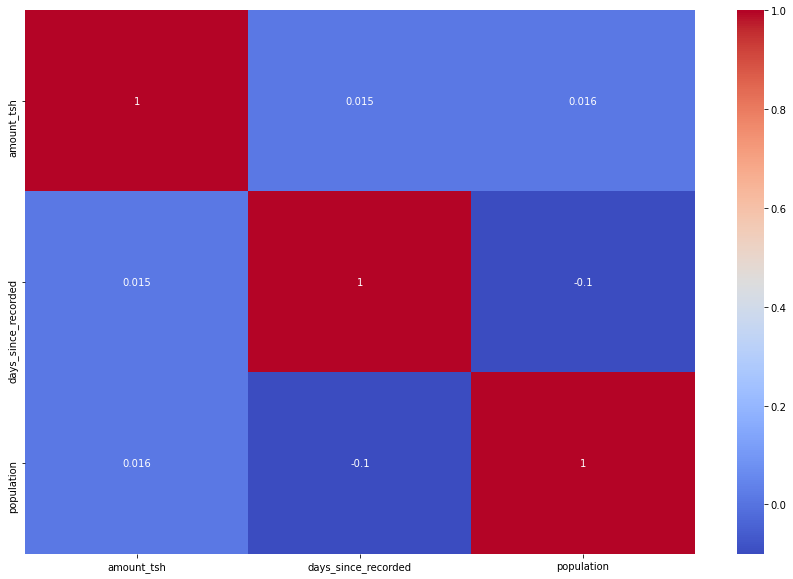

In [66]:
cor = train.corr()
plt.figure(figsize = (15,10))
sns.heatmap(cor.round(3),annot = True,cmap = 'coolwarm')
plt.show()

- Features do not have a high collinerity amongst themselves
- This is good data

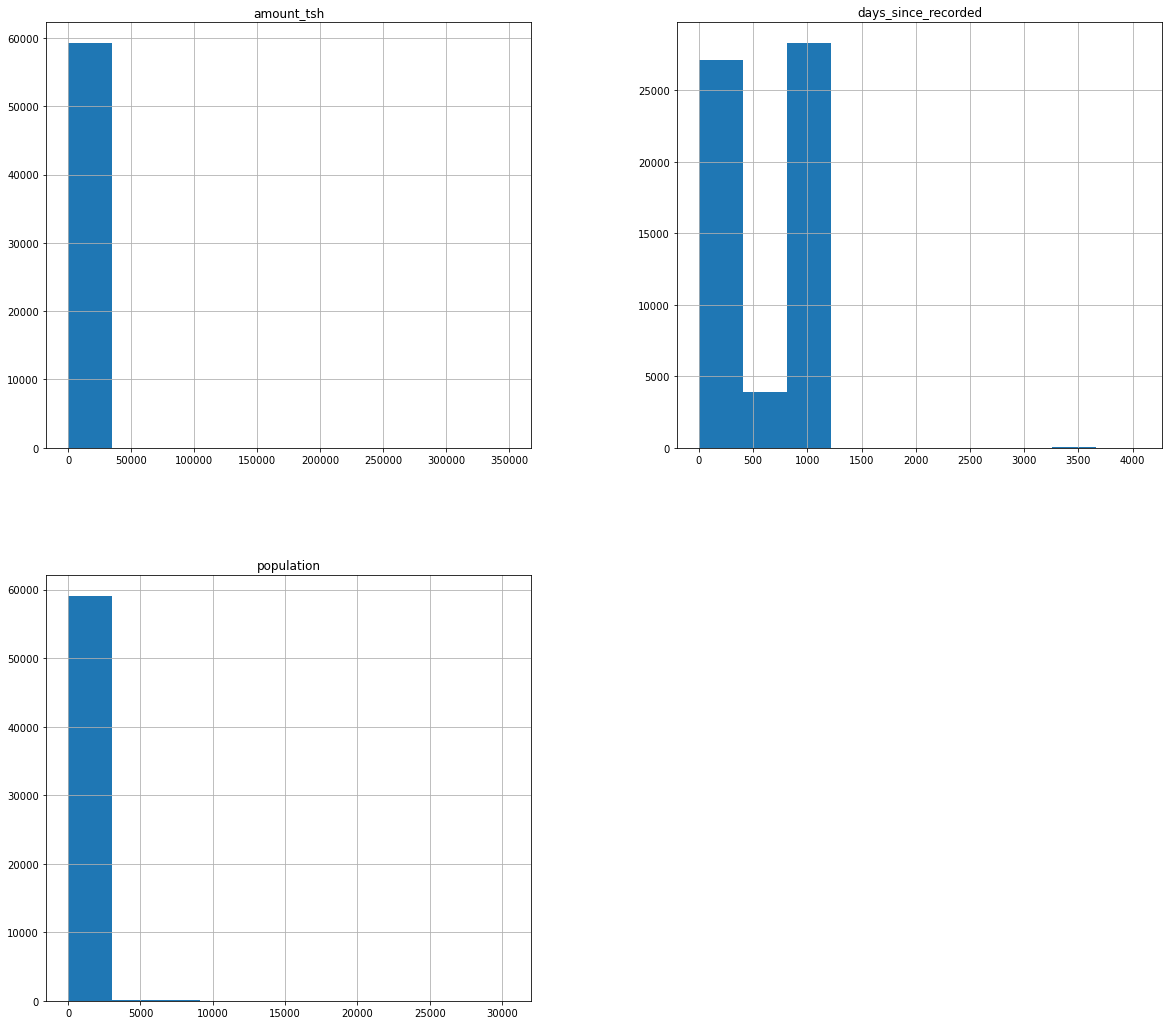

In [67]:
train.hist(figsize = (20,18));